# About Dataset
- This loan datasets was downloaded from Kaggle and provides a comprehensive view of financial loan applications, integrating key features crucial for analytics and data modeling.
- It is structured into facts and dimensions, making it an ideal resource for building data warehouses or practicing advanced analytics techniques.

# Dataset Features
**Loan ID:** Loan ID is a unique identifier assigned to each loan application or loan account.
- It serves as a primary key for tracking and managing individual loans.

**Address State:** Address State indicates the borrower's location.
- It helps in assessing regional risk factors, compliance with state regulations, and estimating default probabilities.

**Employee Length:** Employee Length provides insights into the borrower's employment stability.
- Longer employment durations may indicate greater job security.

**Employee Title:** Employee Title specifies the borrower's occupation or job title.
- It helps lenders understand the source of the borrower's income.

**Grade:** Grade represents a risk classification assigned to the loan based on creditworthiness.
- Higher grades signify lower risk.

**Sub Grade:** Sub Grade refines the risk assessment within a grade, providing additional risk differentiation.

**Home Ownership:** Home Ownership indicates the borrower's housing status.
- It offers insights into financial stability.

**Issue Date:** Issue Date marks the loan's origination date.
- It's crucial for loan tracking and maturity calculations.

**Last Credit Pull Date:** Last Credit Pull Date records when the borrower's credit report was last accessed.
- It helps monitor creditworthiness.

**Last Payment Date:** Last Payment Date marks the most recent loan payment received.
- It tracks the borrower's payment history.

**Loan Status:** Loan Status indicates the current state of the loan (e.g., fully paid, current, default).
- It tracks loan performance.

**Next Payment Date:** Next Payment Date estimates the date of the next loan payment.
- It assists in cash flow forecasting.

**Purpose:** Purpose specifies the reason for the loan (e.g., debt consolidation, education).
- It helps understand borrower intentions.

**Term:** Term defines the duration of the loan in months.
- It sets the repayment period.

**Verification Status:** Verification Status indicates whether the borrower's financial information has been verified.
- It assesses data accuracy.

**Annual Income:** Annual Income reflects the borrower's total yearly earnings.
- It assesses repayment capacity.

**DTI (Debt-to-Income Ratio):** DTI measures the borrower's debt burden relative to income.
- It gauges the borrower's capacity to take on additional debt.

**Instalment:** Instalment is the fixed monthly payment amount for loan repayment, including principal and interest.

**Interest Rate:** Interest Rate represents the annual cost of borrowing expressed as a percentage.
- It determines the loan's cost.

**Loan Amount:** Loan Amount is the total borrowed sum.
- It defines the principal amount.


# Aim of Data Analysis
The aim of this analysis is to perform a customer **segmentation analysis** to identify distinct customer groups based on their **loan characteristics**, **repayment capacity**, and **financial profile**, to better tailor loan products and marketing strategies.



# Research Questions
1. What are the key characteristics of customer segments based on their financial behavior and loan attributes?
2. Which customer segment has the highest risk of default or inability to repay loans?
3. How can loan terms or interest rates be adjusted to attract or retain specific customer segments?

In [ ]:
# Install relevant libraries
!pip install yellowbrick

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
# Load datasets
df_1 = pd.read_csv('LOANS_FACT.csv')
df_2 = pd.read_csv('LOANS_DIMENSION.csv')
df_3 = pd.read_csv('BORROWER_DIMENSION.csv')

## Explore and pre-process loan fact table(df_1)

In [ ]:
# View loan fact table
df_1

,FACT_LOAN_ID,LOAN_AMOUNT,INT_RATE,INSTALLMENT,TOTAL_PAYMENT,DTI,APPLICATION_TYPE,DIM_LOAN_ID,BORROWER_ID,STATE_CODE,ISSUE_DATE_ID,LAST_PAYMENT_DATE_ID,NEXT_PAYMENT_DATE_ID,LAST_CREDIT_PULL_DATE_ID
0,1027822,1800,0.0751,56.00,2013,0.2692,INDIVIDUAL,105,1257204,KY,11-NOV-2021,14-AUG-2021,14-SEP-2021,16-MAY-2021
1,700052,10000,0.0692,308.41,11103,0.2030,INDIVIDUAL,105,891691,NC,11-APR-2021,14-APR-2021,14-MAY-2021,15-NOV-2021
2,661459,6500,0.0729,201.57,7257,0.1988,INDIVIDUAL,247,845936,OH,11-FEB-2021,14-FEB-2021,14-MAR-2021,14-FEB-2021
3,768140,5000,0.0749,155.51,5312,0.1433,INDIVIDUAL,247,969361,CA,11-MAY-2021,12-DEC-2021,12-JAN-2022,12-DEC-2021
4,823069,8000,0.0749,248.82,8615,0.0286,INDIVIDUAL,247,1031607,CT,11-JUL-2021,12-NOV-2021,12-DEC-2021,12-NOV-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,785159,8000,0.1199,265.68,9139,0.0344,INDIVIDUAL,1674,988428,CA,11-JUN-2021,13-JAN-2021,13-FEB-2021,13-FEB-2021
38572,642929,5000,0.0962,160.45,5802,0.1219,INDIVIDUAL,1403,822854,NY,11-JAN-2021,14-MAY-2021,14-JUN-2021,14-OCT-2021
38573,410208,4000,0.1095,130.86,4711,0.0900,INDIVIDUAL,522,460842,TX,09-JUN-2021,12-JUN-2021,12-JUL-2021,14-OCT-2021
38574,711305,6000,0.0963,192.57,6115,0.0287,INDIVIDUAL,522,904195,WA,11-MAR-2021,11-OCT-2021,11-NOV-2021,15-NOV-2021


In [ ]:
# Check feature info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACT_LOAN_ID              38576 non-null  int64  
 1   LOAN_AMOUNT               38576 non-null  int64  
 2   INT_RATE                  38576 non-null  float64
 3   INSTALLMENT               38576 non-null  float64
 4   TOTAL_PAYMENT             38576 non-null  int64  
 5   DTI                       38576 non-null  float64
 6   APPLICATION_TYPE          38576 non-null  object 
 7   DIM_LOAN_ID               38576 non-null  int64  
 8   BORROWER_ID               38576 non-null  int64  
 9   STATE_CODE                38576 non-null  object 
 10  ISSUE_DATE_ID             38576 non-null  object 
 11  LAST_PAYMENT_DATE_ID      38576 non-null  object 
 12  NEXT_PAYMENT_DATE_ID      38576 non-null  object 
 13  LAST_CREDIT_PULL_DATE_ID  38576 non-null  object 
dtypes: flo

- Loan fact table has 14 columns and 38576 rows.
- No null values exist in these columns.
- But the ID and date fields would be changed to their appropriate data type.

In [ ]:
# Changing ID and date fields to apt data types.
df_1[['FACT_LOAN_ID', 'DIM_LOAN_ID','BORROWER_ID']] = df_1[['FACT_LOAN_ID', 'DIM_LOAN_ID','BORROWER_ID']].astype('object')
df_1[['ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID', 'LAST_CREDIT_PULL_DATE_ID']] = df_1[['ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID', 'LAST_CREDIT_PULL_DATE_ID']].apply(pd.to_datetime)

<ipython-input-21-f3f48d8450d7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1[['ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID', 'LAST_CREDIT_PULL_DATE_ID']] = df_1[['ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID', 'LAST_CREDIT_PULL_DATE_ID']].apply(pd.to_datetime)
<ipython-input-21-f3f48d8450d7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1[['ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID', 'LAST_CREDIT_PULL_DATE_ID']] = df_1[['ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID', 'LAST_CREDIT_PULL_DATE_ID']].apply(pd.to_datetime)
<ipython-input-21-f3f48d8450d7>:3: UserWarning: Could not infer format, so each element will be parsed individ

In [ ]:
# Confirm changed data types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FACT_LOAN_ID              38576 non-null  object        
 1   LOAN_AMOUNT               38576 non-null  int64         
 2   INT_RATE                  38576 non-null  float64       
 3   INSTALLMENT               38576 non-null  float64       
 4   TOTAL_PAYMENT             38576 non-null  int64         
 5   DTI                       38576 non-null  float64       
 6   APPLICATION_TYPE          38576 non-null  object        
 7   DIM_LOAN_ID               38576 non-null  object        
 8   BORROWER_ID               38576 non-null  object        
 9   STATE_CODE                38576 non-null  object        
 10  ISSUE_DATE_ID             38576 non-null  datetime64[ns]
 11  LAST_PAYMENT_DATE_ID      38576 non-null  datetime64[ns]
 12  NEXT_PAYMENT_DATE_

## Explore and pre-process loan dimension table(df_2)

In [ ]:
# view table
df_2

,DIM_LOAN_ID,GRADE,SUB_GRADE,TERM,LOAN_STATUS,PURPOSE,VERIFICATION_STATUS
0,1,A,A1,36 months,Fully Paid,Debt consolidation,Source Verified
1,2,A,A1,36 months,Fully Paid,Debt consolidation,Verified
2,3,A,A1,36 months,Fully Paid,credit card,Not Verified
3,4,A,A1,36 months,Fully Paid,credit card,Source Verified
4,5,A,A1,36 months,Fully Paid,credit card,Verified
...,...,...,...,...,...,...,...
3411,3412,D,D1,36 months,Fully Paid,car,Not Verified
3412,3413,D,D1,36 months,Fully Paid,car,Source Verified
3413,3414,D,D1,36 months,Fully Paid,car,Verified
3414,3415,D,D1,36 months,Fully Paid,credit card,Not Verified


In [ ]:
# Check column info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DIM_LOAN_ID          3416 non-null   int64 
 1   GRADE                3416 non-null   object
 2   SUB_GRADE            3416 non-null   object
 3   TERM                 3416 non-null   object
 4   LOAN_STATUS          3416 non-null   object
 5   PURPOSE              3416 non-null   object
 6   VERIFICATION_STATUS  3416 non-null   object
dtypes: int64(1), object(6)
memory usage: 186.9+ KB


- Loan dimension table has 7 cloumns and 3416 rows.
- All columns are devoid of null values.
- Change fields to their right data types.

In [ ]:
# cahnge fields to apt data types
df_2[['DIM_LOAN_ID']] = df_2[['DIM_LOAN_ID']].astype('object')
df_2[['GRADE', 'SUB_GRADE', 'TERM', 'LOAN_STATUS', 'PURPOSE',
       'VERIFICATION_STATUS']]  = df_2[['GRADE', 'SUB_GRADE', 'TERM', 'LOAN_STATUS', 'PURPOSE','VERIFICATION_STATUS']].astype('category')

In [ ]:
# Comfirm changed data types
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   DIM_LOAN_ID          3416 non-null   object  
 1   GRADE                3416 non-null   category
 2   SUB_GRADE            3416 non-null   category
 3   TERM                 3416 non-null   category
 4   LOAN_STATUS          3416 non-null   category
 5   PURPOSE              3416 non-null   category
 6   VERIFICATION_STATUS  3416 non-null   category
dtypes: category(6), object(1)
memory usage: 49.5+ KB


## Explore and pre-process borrower dimension table(df_3)

In [ ]:
# view borrower dimension data
df_3

,BORROWER_ID,EMP_LENGTH,EMP_TITLE,HOME_OWNERSHIP,ANNUAL_INCOME
0,951457,10+ years,United Methodist Church,OWN,51600
1,903783,10+ years,Walmart,OWN,42000
2,902476,3 years,valu home centers,OWN,12582
3,897433,< 1 year,PayPal,RENT,26928
4,942573,4 years,Chapman Medical Center,RENT,36000
...,...,...,...,...,...
38571,896436,3 years,Quest Diagnostics,RENT,46000
38572,982793,5 years,bank of america,OWN,49000
38573,992381,< 1 year,Joseph M Sanzari Company,MORTGAGE,100000
38574,1192039,8 years,Swat Fame,RENT,50000


In [ ]:
# Check feature info
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BORROWER_ID     38576 non-null  int64 
 1   EMP_LENGTH      38576 non-null  object
 2   EMP_TITLE       37138 non-null  object
 3   HOME_OWNERSHIP  38576 non-null  object
 4   ANNUAL_INCOME   38576 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


- Data had 5 columns and 38576 rows.
- The only field with missing values is 'EMP_TITLE' which can be dropped.
- Change all fields to their appropriate data types.

In [ ]:
# Drop  'EMP_TITLE' field
df_3.drop(columns = ['EMP_TITLE'], axis=1, inplace=True)

In [ ]:
df_3.columns

Index(['BORROWER_ID', 'EMP_LENGTH', 'HOME_OWNERSHIP', 'ANNUAL_INCOME'], dtype='object')

In [ ]:
# change all fields to apt types
df_3[['BORROWER_ID']] = df_3[['BORROWER_ID']].astype('object')
df_3[['EMP_LENGTH','HOME_OWNERSHIP']] = df_3[['EMP_LENGTH','HOME_OWNERSHIP']].astype('category')

In [ ]:
# View modified data types
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   BORROWER_ID     38576 non-null  object  
 1   EMP_LENGTH      38576 non-null  category
 2   HOME_OWNERSHIP  38576 non-null  category
 3   ANNUAL_INCOME   38576 non-null  int64   
dtypes: category(2), int64(1), object(1)
memory usage: 678.8+ KB


## Join the three tables

In [ ]:
# First join loan fact and loan dimension tables on 'LOAN_DIMENSION_ID'
merged_data = pd.merge(df_1, df_2, on='DIM_LOAN_ID', how='inner')
merged_data

,FACT_LOAN_ID,LOAN_AMOUNT,INT_RATE,INSTALLMENT,TOTAL_PAYMENT,DTI,APPLICATION_TYPE,DIM_LOAN_ID,BORROWER_ID,STATE_CODE,ISSUE_DATE_ID,LAST_PAYMENT_DATE_ID,NEXT_PAYMENT_DATE_ID,LAST_CREDIT_PULL_DATE_ID,GRADE,SUB_GRADE,TERM,LOAN_STATUS,PURPOSE,VERIFICATION_STATUS
0,1027822,1800,0.0751,56.00,2013,0.2692,INDIVIDUAL,105,1257204,KY,2021-11-11,2021-08-14,2021-09-14,2021-05-16,A,A3,36 months,Fully Paid,car,Not Verified
1,700052,10000,0.0692,308.41,11103,0.2030,INDIVIDUAL,105,891691,NC,2021-04-11,2021-04-14,2021-05-14,2021-11-15,A,A3,36 months,Fully Paid,car,Not Verified
2,661459,6500,0.0729,201.57,7257,0.1988,INDIVIDUAL,247,845936,OH,2021-02-11,2021-02-14,2021-03-14,2021-02-14,A,A4,36 months,Fully Paid,car,Not Verified
3,768140,5000,0.0749,155.51,5312,0.1433,INDIVIDUAL,247,969361,CA,2021-05-11,2021-12-12,2022-01-12,2021-12-12,A,A4,36 months,Fully Paid,car,Not Verified
4,823069,8000,0.0749,248.82,8615,0.0286,INDIVIDUAL,247,1031607,CT,2021-07-11,2021-11-12,2021-12-12,2021-11-12,A,A4,36 months,Fully Paid,car,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,785159,8000,0.1199,265.68,9139,0.0344,INDIVIDUAL,1674,988428,CA,2021-06-11,2021-01-13,2021-02-13,2021-02-13,B,B5,36 months,Fully Paid,vacation,Verified
38572,642929,5000,0.0962,160.45,5802,0.1219,INDIVIDUAL,1403,822854,NY,2021-01-11,2021-05-14,2021-06-14,2021-10-14,B,B3,36 months,Fully Paid,vacation,Verified
38573,410208,4000,0.1095,130.86,4711,0.0900,INDIVIDUAL,522,460842,TX,2021-06-09,2021-06-12,2021-07-12,2021-10-14,B,B1,36 months,Fully Paid,vacation,Verified
38574,711305,6000,0.0963,192.57,6115,0.0287,INDIVIDUAL,522,904195,WA,2021-03-11,2021-10-11,2021-11-11,2021-11-15,B,B1,36 months,Fully Paid,vacation,Verified


In [ ]:
# check data info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FACT_LOAN_ID              38576 non-null  object        
 1   LOAN_AMOUNT               38576 non-null  int64         
 2   INT_RATE                  38576 non-null  float64       
 3   INSTALLMENT               38576 non-null  float64       
 4   TOTAL_PAYMENT             38576 non-null  int64         
 5   DTI                       38576 non-null  float64       
 6   APPLICATION_TYPE          38576 non-null  object        
 7   DIM_LOAN_ID               38576 non-null  object        
 8   BORROWER_ID               38576 non-null  object        
 9   STATE_CODE                38576 non-null  object        
 10  ISSUE_DATE_ID             38576 non-null  datetime64[ns]
 11  LAST_PAYMENT_DATE_ID      38576 non-null  datetime64[ns]
 12  NEXT_PAYMENT_DATE_

In [ ]:
# join merged_data and df3 on 'BORROWER_ID'
merged_data1 = pd.merge(merged_data, df_3, on='BORROWER_ID', how='inner')

# view final merged data
merged_data1

,FACT_LOAN_ID,LOAN_AMOUNT,INT_RATE,INSTALLMENT,TOTAL_PAYMENT,DTI,APPLICATION_TYPE,DIM_LOAN_ID,BORROWER_ID,STATE_CODE,...,LAST_CREDIT_PULL_DATE_ID,GRADE,SUB_GRADE,TERM,LOAN_STATUS,PURPOSE,VERIFICATION_STATUS,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INCOME
0,1027822,1800,0.0751,56.00,2013,0.2692,INDIVIDUAL,105,1257204,KY,...,2021-05-16,A,A3,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,58000
1,700052,10000,0.0692,308.41,11103,0.2030,INDIVIDUAL,105,891691,NC,...,2021-11-15,A,A3,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,50000
2,661459,6500,0.0729,201.57,7257,0.1988,INDIVIDUAL,247,845936,OH,...,2021-02-14,A,A4,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,48000
3,768140,5000,0.0749,155.51,5312,0.1433,INDIVIDUAL,247,969361,CA,...,2021-12-12,A,A4,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,73000
4,823069,8000,0.0749,248.82,8615,0.0286,INDIVIDUAL,247,1031607,CT,...,2021-11-12,A,A4,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,68000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,785159,8000,0.1199,265.68,9139,0.0344,INDIVIDUAL,1674,988428,CA,...,2021-02-13,B,B5,36 months,Fully Paid,vacation,Verified,3 years,RENT,130000
38572,642929,5000,0.0962,160.45,5802,0.1219,INDIVIDUAL,1403,822854,NY,...,2021-10-14,B,B3,36 months,Fully Paid,vacation,Verified,8 years,RENT,17720
38573,410208,4000,0.1095,130.86,4711,0.0900,INDIVIDUAL,522,460842,TX,...,2021-10-14,B,B1,36 months,Fully Paid,vacation,Verified,< 1 year,RENT,34000
38574,711305,6000,0.0963,192.57,6115,0.0287,INDIVIDUAL,522,904195,WA,...,2021-11-15,B,B1,36 months,Fully Paid,vacation,Verified,5 years,RENT,28000


In [ ]:
# Check feature info for final merged table
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FACT_LOAN_ID              38576 non-null  object        
 1   LOAN_AMOUNT               38576 non-null  int64         
 2   INT_RATE                  38576 non-null  float64       
 3   INSTALLMENT               38576 non-null  float64       
 4   TOTAL_PAYMENT             38576 non-null  int64         
 5   DTI                       38576 non-null  float64       
 6   APPLICATION_TYPE          38576 non-null  object        
 7   DIM_LOAN_ID               38576 non-null  object        
 8   BORROWER_ID               38576 non-null  object        
 9   STATE_CODE                38576 non-null  object        
 10  ISSUE_DATE_ID             38576 non-null  datetime64[ns]
 11  LAST_PAYMENT_DATE_ID      38576 non-null  datetime64[ns]
 12  NEXT_PAYMENT_DATE_

Merged data now has a total of 23 columns and 38575 rows.

# Data Preprocessing Prior To Clustering

In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'FACT_LOAN_ID', 'DIM_LOAN_ID', 'BORROWER_ID', 'STATE_CODE',
    'ISSUE_DATE_ID', 'LAST_PAYMENT_DATE_ID', 'NEXT_PAYMENT_DATE_ID',
    'LAST_CREDIT_PULL_DATE_ID', 'SUB_GRADE', 'APPLICATION_TYPE'
]

merged_data1.drop(columns=columns_to_drop, inplace = True)


In [ ]:
# view modified data
merged_data1

,LOAN_AMOUNT,INT_RATE,INSTALLMENT,TOTAL_PAYMENT,DTI,GRADE,TERM,LOAN_STATUS,PURPOSE,VERIFICATION_STATUS,EMP_LENGTH,HOME_OWNERSHIP,ANNUAL_INCOME
0,1800,0.0751,56.00,2013,0.2692,A,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,58000
1,10000,0.0692,308.41,11103,0.2030,A,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,50000
2,6500,0.0729,201.57,7257,0.1988,A,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,48000
3,5000,0.0749,155.51,5312,0.1433,A,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,73000
4,8000,0.0749,248.82,8615,0.0286,A,36 months,Fully Paid,car,Not Verified,10+ years,MORTGAGE,68000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,8000,0.1199,265.68,9139,0.0344,B,36 months,Fully Paid,vacation,Verified,3 years,RENT,130000
38572,5000,0.0962,160.45,5802,0.1219,B,36 months,Fully Paid,vacation,Verified,8 years,RENT,17720
38573,4000,0.1095,130.86,4711,0.0900,B,36 months,Fully Paid,vacation,Verified,< 1 year,RENT,34000
38574,6000,0.0963,192.57,6115,0.0287,B,36 months,Fully Paid,vacation,Verified,5 years,RENT,28000


In [ ]:
# Check data info
merged_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   LOAN_AMOUNT          38576 non-null  int64   
 1   INT_RATE             38576 non-null  float64 
 2   INSTALLMENT          38576 non-null  float64 
 3   TOTAL_PAYMENT        38576 non-null  int64   
 4   DTI                  38576 non-null  float64 
 5   GRADE                38576 non-null  category
 6   TERM                 38576 non-null  category
 7   LOAN_STATUS          38576 non-null  category
 8   PURPOSE              38576 non-null  category
 9   VERIFICATION_STATUS  38576 non-null  category
 10  EMP_LENGTH           38576 non-null  category
 11  HOME_OWNERSHIP       38576 non-null  category
 12  ANNUAL_INCOME        38576 non-null  int64   
dtypes: category(7), float64(3), int64(3)
memory usage: 2.0 MB


In [ ]:
#Creating a copy of data
ds = merged_data1.copy()

## Encode nominal categorical variables using encoded by OneHotEncoding and Ordinal Encoding

In [ ]:
# import library
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding for GRADE and EMP_LENGTH
grade_encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])
merged_data1['GRADE'] = grade_encoder.fit_transform(merged_data1[['GRADE']])

emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10, 'n/a': -1
}
merged_data1['EMP_LENGTH'] = merged_data1['EMP_LENGTH'].map(emp_length_mapping)

# One-Hot Encoding for other fields
categorical_columns = ['TERM', 'LOAN_STATUS', 'PURPOSE', 'VERIFICATION_STATUS', 'HOME_OWNERSHIP']
merged_data1 = pd.get_dummies(merged_data1, columns=categorical_columns, drop_first=True)


In [ ]:
# View encoded data
merged_data1

,LOAN_AMOUNT,INT_RATE,INSTALLMENT,TOTAL_PAYMENT,DTI,GRADE,EMP_LENGTH,ANNUAL_INCOME,TERM_ 60 months,LOAN_STATUS_Current,...,PURPOSE_renewable_energy,PURPOSE_small business,PURPOSE_vacation,PURPOSE_wedding,VERIFICATION_STATUS_Source Verified,VERIFICATION_STATUS_Verified,HOME_OWNERSHIP_NONE,HOME_OWNERSHIP_OTHER,HOME_OWNERSHIP_OWN,HOME_OWNERSHIP_RENT
0,1800,0.0751,56.00,2013,0.2692,0.0,10,58000,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10000,0.0692,308.41,11103,0.2030,0.0,10,50000,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6500,0.0729,201.57,7257,0.1988,0.0,10,48000,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5000,0.0749,155.51,5312,0.1433,0.0,10,73000,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8000,0.0749,248.82,8615,0.0286,0.0,10,68000,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,8000,0.1199,265.68,9139,0.0344,1.0,3,130000,False,False,...,False,False,True,False,False,True,False,False,False,True
38572,5000,0.0962,160.45,5802,0.1219,1.0,8,17720,False,False,...,False,False,True,False,False,True,False,False,False,True
38573,4000,0.1095,130.86,4711,0.0900,1.0,0,34000,False,False,...,False,False,True,False,False,True,False,False,False,True
38574,6000,0.0963,192.57,6115,0.0287,1.0,5,28000,False,False,...,False,False,True,False,False,True,False,False,False,True


## Standardize the data to reduce the impact of outliers on analysis

In [ ]:
# Standardize the data
scaler = StandardScaler()

data_scaled = scaler.fit_transform(merged_data1)

# Change to scaled data to dataframe
data_scaled = pd.DataFrame(data_scaled, columns=merged_data1.columns)

#View scaled data
data_scaled

,LOAN_AMOUNT,INT_RATE,INSTALLMENT,TOTAL_PAYMENT,DTI,GRADE,EMP_LENGTH,ANNUAL_INCOME,TERM_ 60 months,LOAN_STATUS_Current,...,PURPOSE_renewable_energy,PURPOSE_small business,PURPOSE_vacation,PURPOSE_wedding,VERIFICATION_STATUS_Source Verified,VERIFICATION_STATUS_Verified,HOME_OWNERSHIP_NONE,HOME_OWNERSHIP_OTHER,HOME_OWNERSHIP_OWN,HOME_OWNERSHIP_RENT
0,-1.272820,-1.221310,-1.295442,-1.132512,2.039068,-1.142096,1.410461,-0.181117,-0.605104,-0.171164,...,-0.049424,-0.219684,-0.095963,-0.157001,-0.582659,-0.685614,-0.008819,-0.050467,-0.2818,-0.95691
1,-0.173720,-1.380067,-0.088254,-0.128201,1.045979,-1.142096,1.410461,-0.305548,-0.605104,-0.171164,...,-0.049424,-0.219684,-0.095963,-0.157001,-0.582659,-0.685614,-0.008819,-0.050467,-0.2818,-0.95691
2,-0.642848,-1.280507,-0.599232,-0.553127,0.982973,-1.142096,1.410461,-0.336656,-0.605104,-0.171164,...,-0.049424,-0.219684,-0.095963,-0.157001,-0.582659,-0.685614,-0.008819,-0.050467,-0.2818,-0.95691
3,-0.843903,-1.226691,-0.819521,-0.768021,0.150399,-1.142096,1.410461,0.052190,-0.605104,-0.171164,...,-0.049424,-0.219684,-0.095963,-0.157001,-0.582659,-0.685614,-0.008819,-0.050467,-0.2818,-0.95691
4,-0.441794,-1.226691,-0.373252,-0.403088,-1.570256,-1.142096,1.410461,-0.025579,-0.605104,-0.171164,...,-0.049424,-0.219684,-0.095963,-0.157001,-0.582659,-0.685614,-0.008819,-0.050467,-0.2818,-0.95691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,-0.441794,-0.015830,-0.292616,-0.345194,-1.483248,-0.422085,-0.554293,0.938759,-0.605104,-0.171164,...,-0.049424,-0.219684,10.420696,-0.157001,-0.582659,1.458548,-0.008819,-0.050467,-0.2818,1.04503
38572,-0.843903,-0.653550,-0.795894,-0.713883,-0.170630,-0.422085,0.849102,-0.807625,-0.605104,-0.171164,...,-0.049424,-0.219684,10.420696,-0.157001,-0.582659,1.458548,-0.008819,-0.050467,-0.2818,1.04503
38573,-0.977940,-0.295674,-0.937413,-0.834423,-0.649173,-0.422085,-1.396331,-0.554409,-0.605104,-0.171164,...,-0.049424,-0.219684,10.420696,-0.157001,-0.582659,1.458548,-0.008819,-0.050467,-0.2818,1.04503
38574,-0.709867,-0.650860,-0.642276,-0.679301,-1.568756,-0.422085,0.007065,-0.647732,-0.605104,-0.171164,...,-0.049424,-0.219684,10.420696,-0.157001,-0.582659,1.458548,-0.008819,-0.050467,-0.2818,1.04503


## Dimensionality Reduction using PCA
**Principal component analysis (PCA)** is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss.


In [ ]:
# Import relevant libraries
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)

# Fit PCA to scaled_data
pca.fit(data_scaled)

# Change new dimension to dataframe
PCA_ds = pd.DataFrame(pca.transform(data_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe()

,col1,col2,col3
count,38576.000000,3.857600e+04,3.857600e+04
mean,0.000000,4.715340e-17,-4.567985e-17
std,1.982322,1.429273e+00,1.239950e+00
min,-3.822797,-2.066193e+01,-1.372326e+01
25%,-1.488428,-9.783049e-01,-7.782075e-01
50%,-0.431850,-8.293704e-02,1.590106e-01
75%,1.133761,9.034165e-01,9.233743e-01
max,12.820672,6.385613e+00,3.542217e+00


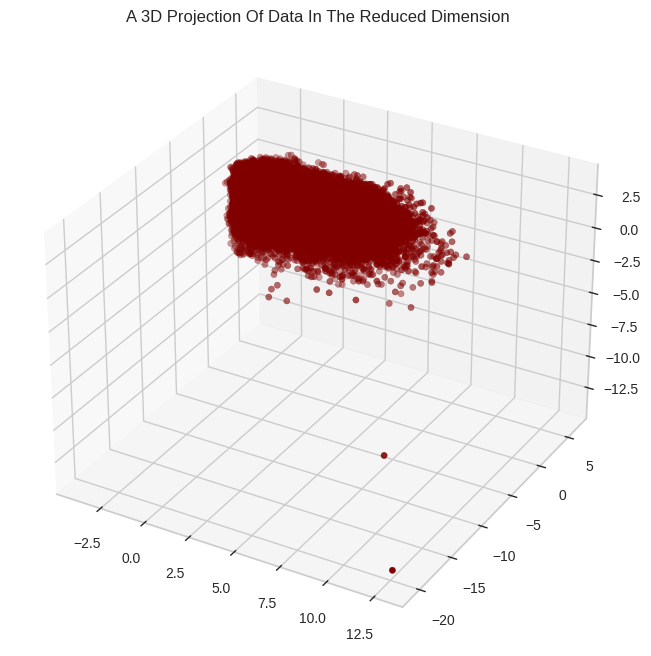

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative  clustering.
Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**

- Elbow Method to determine the number of clusters to be formed
- Clustering via agglomerative means
- Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


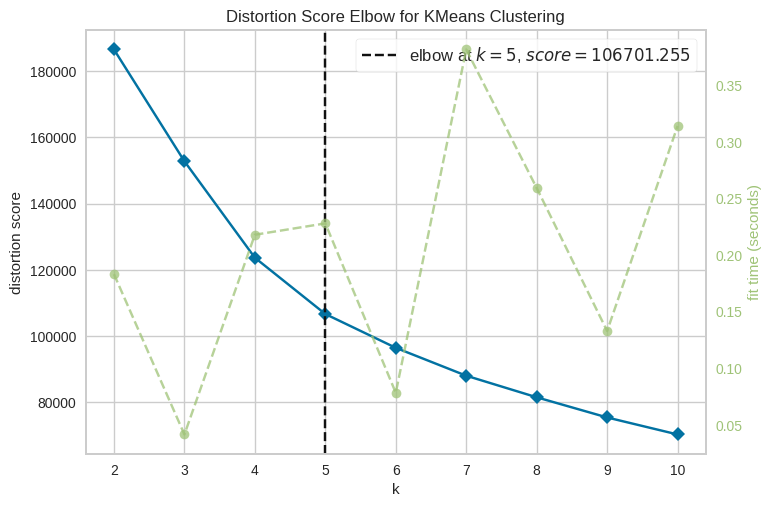

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that five will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [ ]:
# From the elbow plot, choose the optimal number of clusters (5)
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)

# fit model and predict clusters
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe and encoded dataframe.
ds['Clusters'] = yhat_AC
merged_data1["Clusters"]= yhat_AC


# To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

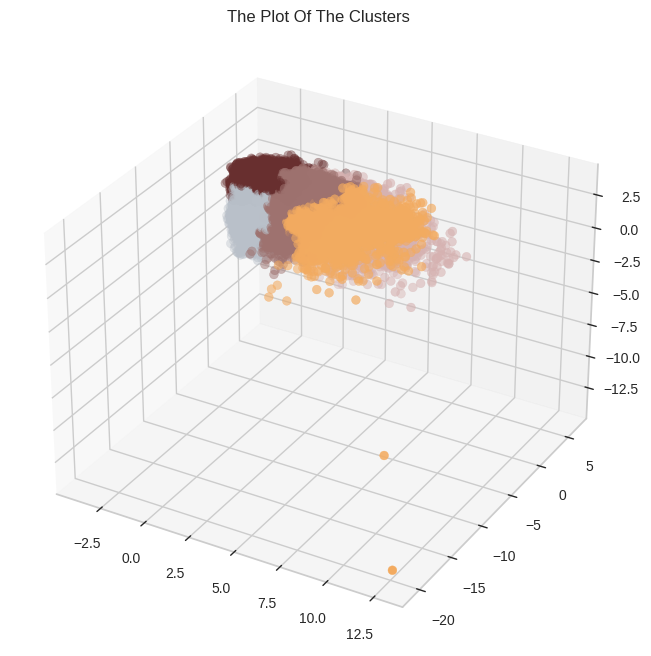

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#F3AB60"])
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# EVALUATING MODELS

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.
For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustring**

<ipython-input-50-91a9dce88e64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=merged_data1["Clusters"], palette= pal)


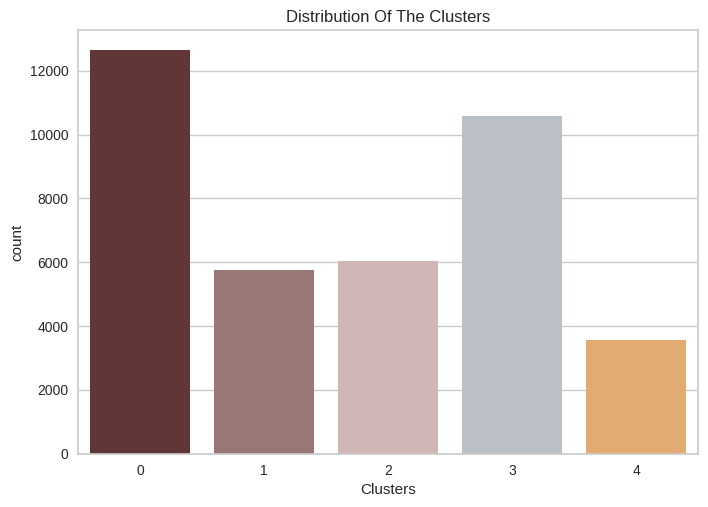

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#F3AB60"]
pl = sns.countplot(x=merged_data1["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters are not evenly distributed.
There are significant differences in the number of observations in each cluster. Cluster 0 has the highest number of observations, while Cluster 4 has the lowest.

# Answering Research Questions

# Research Question 1. Key Characteristics of Customer Segments Based on Financial Behavior and Loan Attributes
Plots to Use:
Cluster Profiles: Visualize how customer segments differ based on key attributes.
- Bar plots for categorical variables (e.g., GRADE, PURPOSE).
- Box plots for numerical variables (e.g., LOAN_AMOUNT, INT_RATE).

<ipython-input-51-357ec76f2e99>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data1, x='Clusters', y=col, palette=pal)
<ipython-input-51-357ec76f2e99>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data1, x='Clusters', y=col, palette=pal)
<ipython-input-51-357ec76f2e99>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data1, x='Clusters', y=col, palette=pal)
<ipython-input-51-357ec76f2e99>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. A

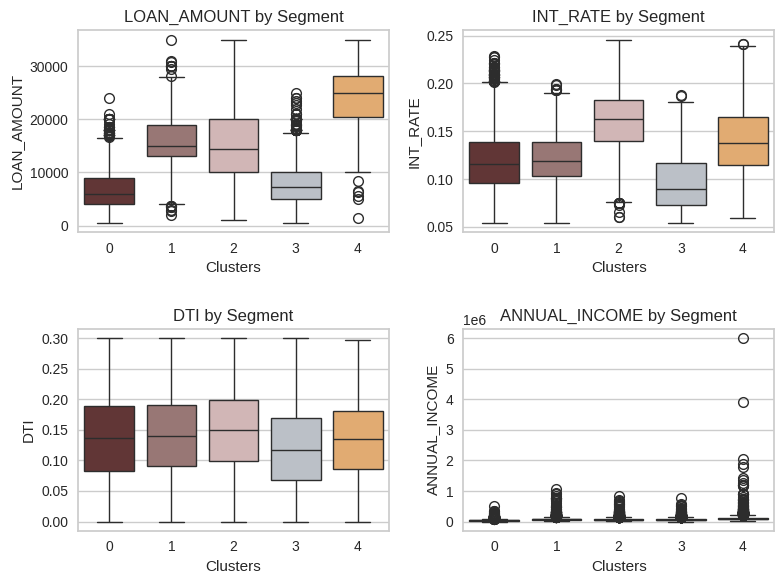

In [ ]:
# Box plot for financial attributes by segment
# Define numerical columns for analysis
numerical_cols = ['LOAN_AMOUNT', 'INT_RATE', 'DTI', 'ANNUAL_INCOME']

# Create a 2x2 subplot figure with specified size
plt.figure(figsize=(8, 6))

# Iterate over numerical columns
for i, col in enumerate(numerical_cols):
    # Create subplot at specified position (2x2 grid)
    plt.subplot(2, 2, i + 1)

    # Generate boxplot for each column by cluster
    sns.boxplot(data=merged_data1, x='Clusters', y=col, palette=pal)

    # Set title for each subplot
    plt.title(f"{col} by Segment")

# Adjust subplot layout for better spacing
plt.tight_layout()

# Display plot
plt.savefig('Loan Attri. Dist By Clusters.png')
plt.show()

# **Charts Analysis**
1. **Loan Amount**:
   - Segment 4 stands out with the highest loan amounts, suggesting that customers in this group are approved for or apply for larger loans.
   - Segment 3 shows a lower median loan amount compared to others, indicating more modest borrowing behavior.

2. **Interest Rate (INT_RATE)**:
   - Segments 4 and 3 have higher median interest rates, likely indicating higher-risk borrowers or loans with less favorable terms.
   - Segments 0 and 2 have lower median interest rates, suggesting better creditworthiness or favorable loan conditions.

3. **Debt-to-Income Ratio (DTI)**:
   - DTI levels are relatively consistent across clusters, but Segment 4 shows slightly higher debt-to-income ratios, which might indicate customers with heavier financial obligations.

4. **Annual Income**:
   - Segment 4 shows the highest variation in annual income, suggesting it includes both high-income and low-income borrowers, while other segments demonstrate more consistent income levels.



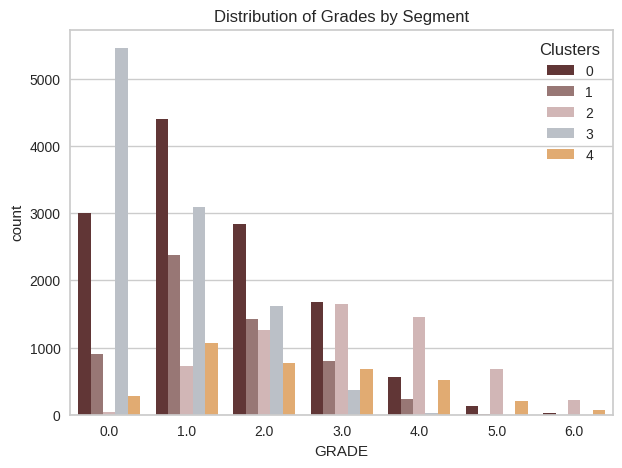

In [ ]:
# Add a column for segments (assuming you already performed clustering)
# For example: merged_data1['Segment'] = kmeans.labels_

# set figsize
plt.figure(figsize=(7,5))
# Bar plot for categorical characteristics by segment
sns.countplot(data=merged_data1, x='GRADE', hue='Clusters', palette=pal)
plt.title("Distribution of Grades by Segment")

# Save chart
plt.savefig('GradeDistributionBySegment')

# display chart
plt.show()




# **Chart Analysis**
1. **Grade Distribution**:
   - Segment 3 has the highest concentration of lower loan grades (0.0), indicating a preference or eligibility for higher-risk loans.
   - Segments 0 and 1 also include customers with diverse grade distributions, whereas Segment 4 has relatively fewer borrowers across all grades.
   
These insights highlight how different segments vary in terms of financial risk, loan terms, and income levels, offering guidance for tailored financial products or risk management strategies.

# Research Question 2. Customer Segment with the Highest Risk of Default or Inability to Repay
Plots to Use:
- Default Rate by Segment: Calculate default rates for each segment using LOAN_STATUS and visualize as bar plots.
- Heatmap: Show correlations between DTI, INT_RATE, and default status to identify high-risk indicators.

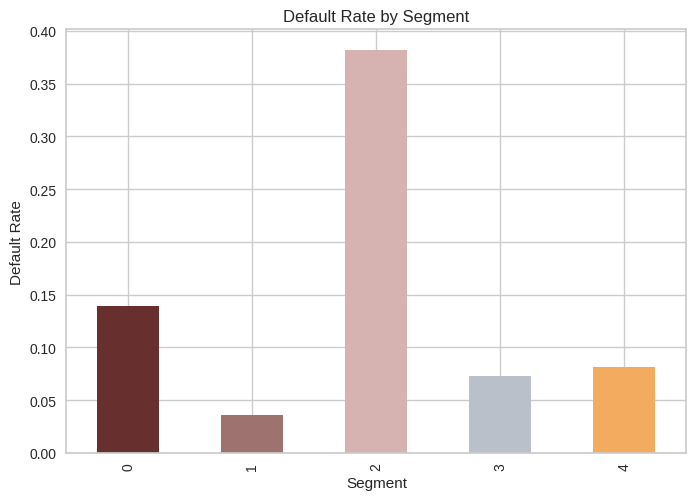

In [ ]:
# Default rate by segment
default_rate = ds[ds['LOAN_STATUS'] == 'Charged Off'].groupby('Clusters').size() / ds.groupby('Clusters').size()
default_rate.plot(kind='bar', color=["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#F3AB60"])
plt.title("Default Rate by Segment")
plt.ylabel("Default Rate")
plt.xlabel("Segment")
# Save chart
plt.savefig('Default Rate by Segment')
plt.show()

# **Chart Analysis**

**Segment 2 Has the Highest Default Rate**:
The bar chart clearly shows that Segment 2 has the highest default rate (close to 40%), making it the riskiest group in terms of repayment ability.



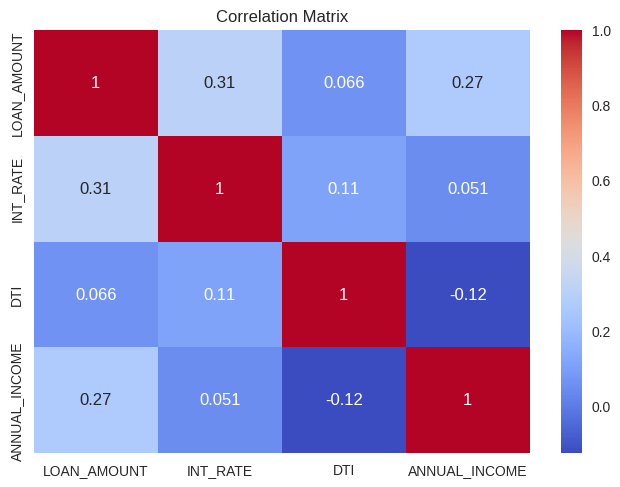

In [ ]:
# Heatmap of correlations
correlation_matrix = merged_data1[['LOAN_AMOUNT', 'INT_RATE', 'DTI', 'ANNUAL_INCOME']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

# Save chart
plt.savefig('correlation matrix')

# Show chart
plt.show()

1. **Debt-to-Income (DTI) Ratio Correlation**:
   The heatmap reveals that DTI has a weak correlation with loan-related variables, such as loan amount (0.066) and interest rate (0.11), indicating that DTI alone may not be a strong predictor of default.

2. **Interest Rate (INT_RATE) as a Risk Factor**:
   The heatmap shows a moderate correlation (0.31) between interest rate and loan amount. Higher interest rates might be associated with higher default risk, particularly in Segment 2.

3. **Loan Amount and Default Risk**:
   Loan amount has a positive correlation with both interest rate (0.31) and annual income (0.27). Customers in Segment 2 might be those with higher loan amounts and insufficient financial capacity to repay.

4. **Weak Relationship with Annual Income**:
   Annual income has a negative correlation with DTI (-0.12) and only a slight correlation with loan amount (0.27), suggesting that income alone is not a decisive factor in defaulting, especially for Segment 2.

These insights highlight Segment 2 as the highest-risk group, driven by high default rates and possibly influenced by higher interest rates and loan amounts.

# Research Question 3. Adjusting Loan Terms or Interest Rates to Attract or Retain Specific Segments
Plots to Use:
- Segment Preferences: Analyze preferences in TERM and INT_RATE for each segment using violin or box plots.
- Scatter Plot: Visualize the relationship between LOAN_AMOUNT, INT_RATE, and customer segments.

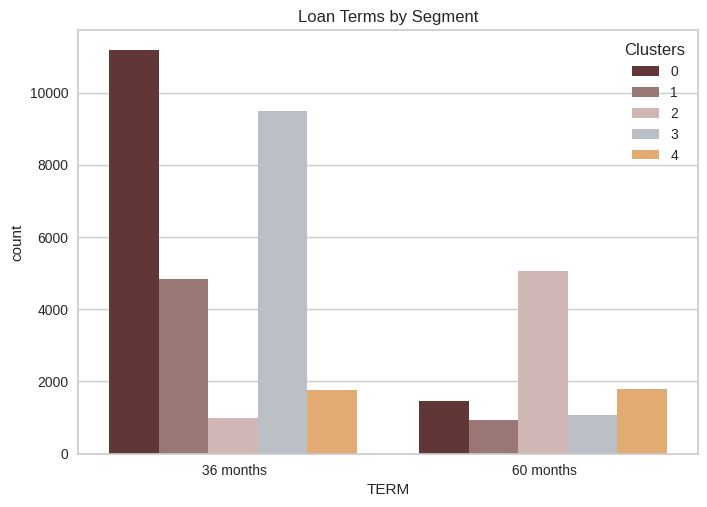

In [ ]:
# Preferences in terms
sns.countplot(data=ds, x='TERM', hue='Clusters', palette=pal)

# Define palette for charts
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#F3AB60"]

plt.title("Loan Terms by Segment")

# Save Chart
plt.savefig('LoanTermsbySegment')
# show chart
plt.show()



# **Chart Analysis**
1. **Short-Term Preference**: Segments 0 and 3 prefer 36-month loans; offer lower rates for short terms.  
2. **Long-Term Focus**: Segment 2 prefers 60-month loans; target them with flexible payment options.  
3. **High Volume Segments**: Segments 0 and 3 dominate; prioritize them with special offers.  
4. **Balanced Preference**: Segment 4 chooses both terms equally; use competitive rates for both.  
5. **Low Engagement**: Segment 1 has low volume; attract them with discounts and perks.  

<ipython-input-62-445282da18d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ds, x='Clusters', y='INT_RATE', palette = pal)


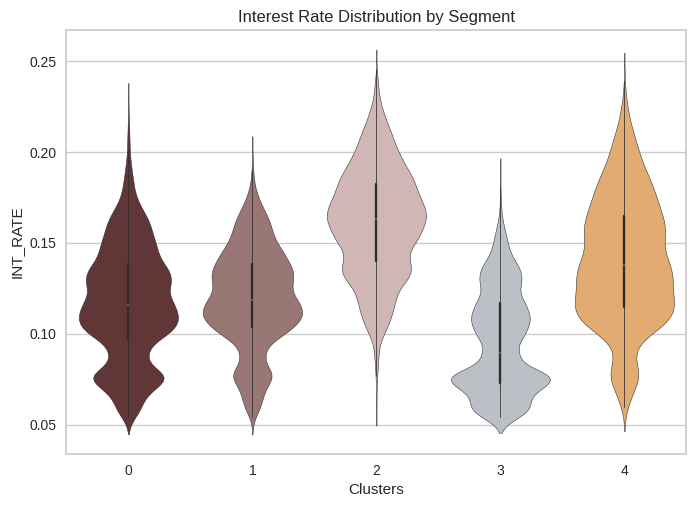

In [ ]:
# Violin plot for interest rates
sns.violinplot(data=ds, x='Clusters', y='INT_RATE', palette = pal)
plt.title("Interest Rate Distribution by Segment")

# save chart
plt.savefig('InterestRateDistributionbySegment')
plt.show()


# **Chart Analysis**
1. Segment Differences in Interest Rate Preferences:

The violin plots reveal distinct distributions of preferred interest rates across different segments. This indicates that segments have varying preferences for interest rates. Some segments might be more sensitive to interest rates and prefer lower rates, while others might be less price-sensitive.
2. Segment-Specific Strategies:

The visualization suggests that targeted strategies can be employed to attract or retain specific segments. For instance, to attract segment 0, offering lower interest rates could be effective. Conversely, for segment 4, focusing on slightly higher rates might be more appealing.
3. Potential for Cross-Selling and Upselling:

The plot might reveal opportunities for cross-selling or upselling. For example, if segment 2 tends to prefer lower interest rates, offering additional financial products like insurance or investment options could be considered.
4. Risk Assessment:

The distribution of interest rate preferences could be analyzed further to assess risk. Segments with a higher proportion of customers preferring lower interest rates might require more stringent credit checks and risk assessment.
5. Competitive Analysis:

Understanding the interest rate preferences of different segments can help you position your loan offerings competitively. By analyzing the competitive landscape and customer preferences, you can adjust your interest rate strategy to attract and retain customers.

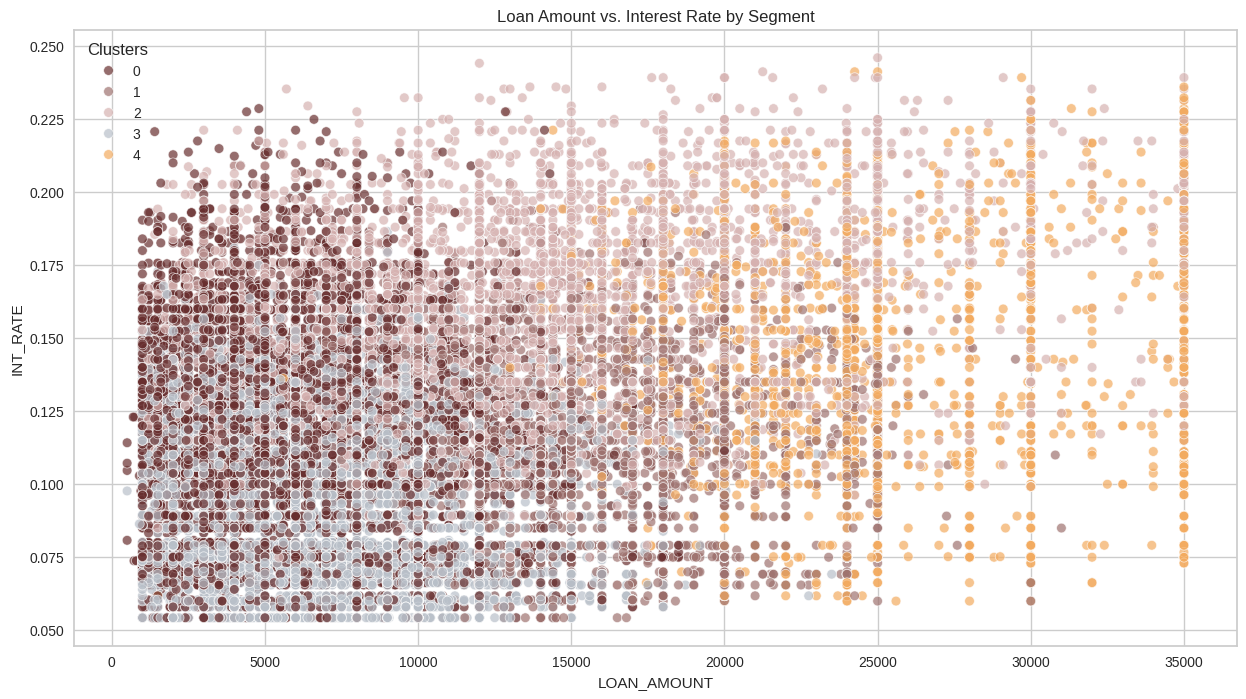

In [ ]:
# Scatter plot for loan amount vs. interest rate by segment
plt.figure(figsize=(15, 8))
sns.scatterplot(data=ds, x='LOAN_AMOUNT', y='INT_RATE', hue='Clusters', palette=pal, alpha=0.7)

# Increase figsize
plt.title("Loan Amount vs. Interest Rate by Segment")

# save chart
plt.savefig('scatterplot')
plt.show()

# **Chart Analysis**
1. **Cluster 0**: Risk-Averse Borrowers
Profile: These customers prioritize low-interest rates, regardless of loan amount.
Strategy: Offer fixed-rate loans and explore cross-selling opportunities.

2. **Cluster 1:** Diverse Borrowers
Profile: This diverse group has varying needs in terms of interest rates and loan amounts.
Strategy: Provide a range of loan products with flexible terms and personalized marketing.

3. **Cluster 2:** High-Value Borrowers
Profile: These customers are willing to pay higher interest rates for larger loans.
Strategy: Offer high-limit loans with competitive rates and stringent credit checks.

4. **Cluster 3:** Small-Loan Seekers
Profile: These customers need smaller loans with low interest rates.
Strategy: Provide quick and easy online loan applications with competitive rates and low limits.

5. **Cluster 4:** Short-Term Borrowers
Profile: These customers seek smaller loans with higher interest rates and shorter terms.
Strategy: Offer short-term loans with flexible repayment options.

# Segment/Cluster Profiling

**Cluster 0**
- Tends to have lower loan amounts compared to other clusters.
- Has the lowest median interest rate compared to other clusters.
- Generally lower DTI, indicating lower levels of debt.
- Wide range of annual income, with some outliers at the higher end.
- Diverse Creditworthiness
- Moderate default rate
- Prefers lower interest rates
- Prefers lower interest rates, with a wide range of loan amounts.

**Cluster 1**
- Moderate loan amounts, slightly higher than Cluster 0.
- Slightly higher interest rate compared to Cluster 0.
- Moderate DTI, indicating a balance between debt and income.
- Moderate to high annual income range.
- Moderately Creditworthy
- Very low default rate
- Moderate interest rate preference
- Moderate interest rate preference, with a wide range of loan amounts.



**Cluster 2**
- Moderate to high loan amounts.
- Moderate interest rate, higher than Clusters 0 and 1.
- Moderate to high DTI, suggesting higher debt levels.
- Moderate to high annual income range.
- Lower to Moderate Creditworthiness
- Highest default rate
- Moderate interest rate preference, slightly higher than Cluster 1
- Moderate interest rate preference, with a wide range of loan amounts.

**Cluster 3**
- Moderate loan amounts, similar to Cluster 1.
- Moderate interest rate, similar to Cluster 2.
- Moderate DTI, similar to Cluster 1.
- Moderate to high annual income range.
- Moderately Creditworthy
- Very low default rate
- Prefers lower interest rates
- Prefers lower interest rates, with a moderate range of loan amounts.


**Cluster 4**
- Highest loan amounts among all clusters.
- Highest median interest rate, indicating a willingness to pay higher rates.
- Moderate to high DTI, suggesting higher debt levels.
- Wide range of annual income, with outliers at both the lower and higher ends.
- Lower Creditworthiness
- Very low default rate
- Prefers higher interest rates
- Prefers higher interest rates, with a wide range of loan amounts.

